In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import pandas as pd

import catalog
import computations as cp
import figures
import histograms

catalog.display_params_for_catalog()

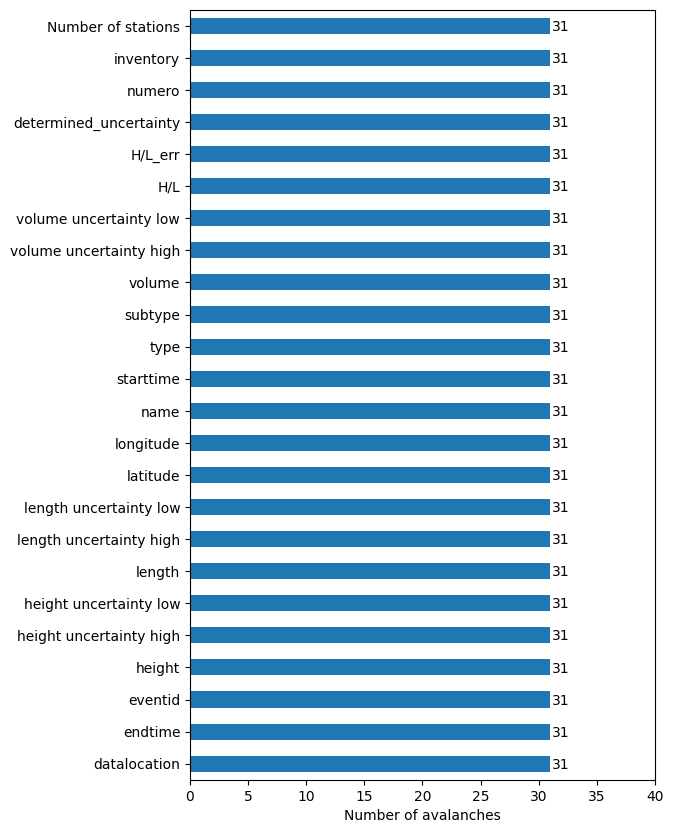

In [3]:
ESEC_avalanches = catalog.load("catalog/9_ESEC_avalanches_31.pickle")

histograms.open_catalog(ESEC_avalanches, pos_number=0.15, xlim=40)

# Importation des données
##### features.csv = features sismologiques provenant des premières traces de chaque événement ayant été détecté par la méthode de détection
##### entropie_final_10_20.csv = features d'entropie. Contient tous les événements ayant été détecté par la méthode de détection. Contient l'aire, energie minimum et l'asymétrie de l'enveloppe de l'entropie. Contient aussi la pente de perte d'énergie de l'entropie en mesurant chaque valeur minimale des enveloppes par événement.
##### dataframe_event_X.csv = features brutes de chaque trace (de 0 à 200 km) par événement. Contient tous les événements ayant été détecté par la méthode de détection. Contient la distance de chaque trace ainsi que l'asymétrie, l'aire et l'énergie maximale de chaque enveloppe d'énergie des traces. Contient aussi une pente qui donne une information sur la perte d'énergie de toutes les traces

In [4]:
fitting_1 = cp.merge_dataframes(dossier = "features/1_fitting/data", name = "curve_parameters*.csv", area_to_save = 'features/1_fitting/data/fitting_1.csv')
energy_2 = cp.merge_dataframes(dossier = "features/2_energie/data", name = "dataframe_event_*.csv", area_to_save = 'features/2_energie/data/energy_2.csv')

In [5]:
fitting_1 = pd.read_csv("features/1_fitting/data/fitting_1.csv")
energy_2 = pd.read_csv("features/2_energie/data/energy_2.csv")
entropy_3 = pd.read_csv('features/3_entropie/data/curve_parameters.csv')

In [6]:
fitting_1.rename(columns={'Event Index': 'event_index'}, inplace=True)
energy_2.rename(columns={'Event Index': 'event_index'}, inplace=True)
entropy_3.rename(columns={'Event Index': 'event_index'}, inplace=True)

In [7]:
features_dataframe = fitting_1.merge(energy_2, on='event_index', how='outer').merge(entropy_3, on='event_index', how='outer')

In [8]:
len(features_dataframe)

41

In [9]:
features_dataframe = features_dataframe.dropna()

In [10]:
len(features_dataframe)

31

In [11]:
features_dataframe = features_dataframe.reset_index(drop=True)
features_dataframe.to_pickle("catalog/10_features_dataframe.pickle")

In [12]:
features_dataframe

,event_index,Fréquence coin,Slope basse frequence,Intercept basse frequence,First PSD basse frequence,PSD requence coin,Slope haute frequence,Intercept haute frequence,Last PSD haute frequence,numero1,distance,asymétrie,aire,energie_max_trace,Impulsion,starttime,endtime,durée,numero2,FC_ent,Slope_BF_ent,Intercept_BF_ent,First Value_BF_ent,FC_value_ent,Slope_HF_ent,Intercept_HF_ent,Last Value_HF_ent,type,numero3,volume,length,height
0,0,1.200000,-1.130638,-27.675584,1.145398e-12,1.991939e-12,-6.884406,-26.547071,6.896227e-19,0,48.810398,0.902101,2.305207e-09,8.826329e-11,-9.263929e-14,490.0,570.0,80.0,0,6.340793,0.003094,-0.384616,0.619136,0.876625,0.090427,-0.546230,0.760580,rock and ice avalanche,0.0,54000000.0,5760.0,1860.0
1,2,1.500000,-2.239824,-35.229877,2.835787e-15,2.418469e-15,-5.302421,-32.668217,8.146083e-20,2,17.706439,3.960870,9.127628e-12,1.894704e-13,-1.374417e-17,284.0,1010.0,726.0,2,8.511064,0.005103,-0.586111,0.486057,0.514846,-0.014223,-0.546362,0.634759,rock avalanche,2.0,3000000.0,3730.0,931.0
2,3,1.050000,-1.709768,-35.329083,1.451840e-15,1.893866e-16,-5.616421,-34.737943,2.103155e-21,3,67.246074,1.968639,2.845638e-12,9.430729e-14,-2.002356e-17,504.0,652.0,148.0,3,7.270909,0.001945,-0.230167,0.434874,0.614271,0.008541,-0.253602,0.779497,rock and debris avalanche,3.0,2600000.0,2000.0,690.0
3,5,1.050000,-5.322399,-34.601973,3.928697e-15,3.173081e-16,-3.083978,-36.460585,1.313716e-19,5,41.309011,1.298998,8.572617e-12,3.382746e-13,-1.136657e-16,516.0,604.0,88.0,5,8.341043,0.005758,-0.098577,0.882726,0.666802,-0.002487,-0.084408,0.953700,"rock avalanche, debris flow",5.0,1900000.0,4320.0,1240.0
4,9,2.600000,-0.245153,-34.144431,9.990024e-16,7.898024e-15,-5.364591,-28.544468,1.119058e-18,9,63.494455,2.137435,3.068379e-12,7.825895e-14,-1.532896e-16,508.0,784.0,276.0,9,6.130766,0.015895,-0.523682,0.662276,0.714135,0.186102,-0.857908,0.685979,rock avalanche,9.0,46700.0,550.0,560.0
5,10,1.550000,-3.218066,-34.813628,3.734171e-15,5.791412e-17,-5.277870,-31.852358,1.638337e-20,10,6.713114,2.248487,2.790730e-12,9.404596e-14,-1.117881e-16,508.0,720.0,212.0,10,5.445681,-0.005236,-1.119635,0.319311,0.355229,0.056486,-1.302956,0.322775,ice avalanche,10.0,2460000.0,3600.0,1300.0
6,11,2.010376,0.903609,-33.302199,1.429776e-15,5.395869e-14,-6.066409,-27.011185,1.511075e-20,11,5.755487,3.618546,2.583214e-12,1.314871e-13,-1.006196e-17,390.0,684.0,294.0,11,8.911114,-0.006789,-1.156661,0.321223,0.320492,0.082726,-1.368873,0.323595,rock avalanche,11.0,310000.0,2500.0,1300.0
7,22,1.050000,0.716944,-27.208652,4.872842e-13,6.300358e-13,-4.944716,-27.452559,4.261771e-18,22,6.338559,0.997402,1.647212e-09,4.530507e-11,-2.592499e-14,498.0,614.0,116.0,22,9.086136,0.014105,-1.243018,0.300792,0.267705,0.051464,-1.325295,0.315076,rock and ice avalanche,22.0,11000000.0,7800.0,1830.0
8,23,1.100000,-4.507507,-35.378693,3.510016e-15,1.720535e-16,-6.239395,-35.691426,4.831648e-22,23,50.680001,1.204048,1.784279e-12,7.579696e-14,-1.962485e-17,522.0,610.0,88.0,23,8.206026,0.009419,-0.771323,0.451976,0.436399,0.025577,-0.812968,0.505112,rock and ice avalanche,23.0,1700000.0,3500.0,1300.0
9,24,1.200000,-5.450660,-32.377236,9.254231e-14,1.362840e-15,-4.924537,-33.585394,6.442735e-20,24,18.181617,1.547427,7.215473e-11,1.253726e-12,-6.624809e-16,516.0,848.0,332.0,24,6.005751,0.014352,-0.653290,0.508714,0.492935,-0.008335,-0.609495,0.554097,debris avalanche-flow,24.0,8300000.0,1700.0,180.0


In [13]:
features_dataframe = features_dataframe.drop(13)

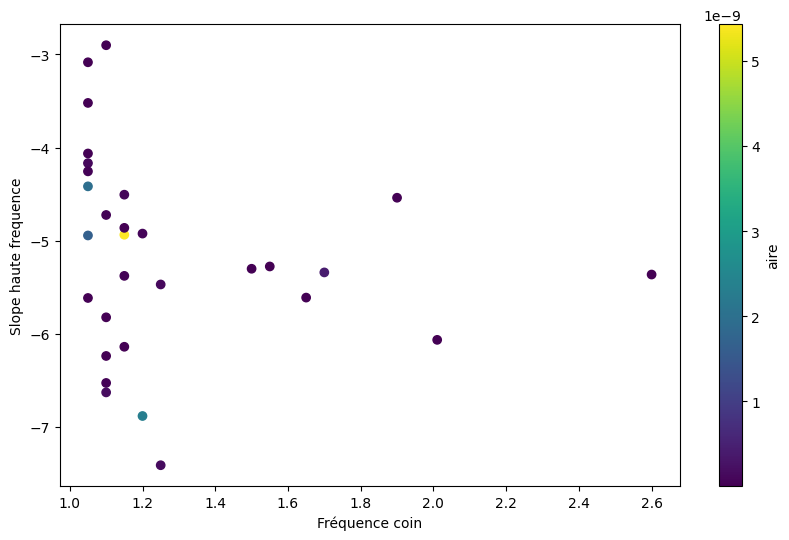

In [14]:
color_map = {"rock avalanche": "brown","rock slide, rock avalanche": "brown","rock slide": "brown","landslide": "darkblue","rock and ice avalanche": "darkblue","rock and debris avalanche": "darkblue",
    "rock fall, rock and ice avalanche": "darkblue","ice and rock avalanche": "darkblue","ice and debris avalanche": "darkblue","rock avalanche, debris flow": "darkblue",
    "ice avalanche": "cyan","snow avalanche": "cyan","debris avalanche-flow": "cyan","debris avalanche":"cyan"}

X = "Fréquence coin"
Y = "Slope haute frequence"
Z = "aire"

colors = [color_map.get(subtype, "gray") for subtype in features_dataframe["type"]]

plt.figure(figsize=(10, 6))#, dpi=100)
plt.scatter(features_dataframe[X], features_dataframe[Y], c=features_dataframe[Z])

plt.xlabel(X)
plt.ylabel(Y)
plt.colorbar(label=Z)

# plt.xscale("log")
# plt.yscale("log")

# handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in color_map.items()]
# plt.legend(handles=handles, title="type", loc='upper right', bbox_to_anchor=(1.4, 1))

# plt.legend()

figures.save(f"figures/final/figures_{X}_{Y}_{Z}", tight_layout=False)
plt.show()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


#Fonction linéaire
def plot_linear_regression(data, X, Y):
    X_data = data[X].values
    Y_data = data[Y].values

    # Supprimer les valeurs NaN
    mask = ~np.isnan(X_data) & ~np.isnan(Y_data)
    X_data = X_data[mask]
    Y_data = Y_data[mask]

    # Appliquer la transformation logarithmique
    X_data_log = np.log(X_data).reshape(-1, 1)
    Y_data_log = np.log(Y_data)

    model = LinearRegression()
    model.fit(X_data_log, Y_data_log)
    y_pred = model.predict(X_data_log)
    r2 = r2_score(Y_data_log, y_pred)

    x_range = np.linspace(X_data_log.min(), X_data_log.max(), 100).reshape(-1, 1)
    y_range = model.predict(x_range)
    
    # Revenir à l'échelle normale pour tracer
    plt.plot(np.exp(x_range), np.exp(y_range), color="grey", linestyle='--', label=f'Modèle linéaire (R²={r2:.2f})')



# Fonction pour ajuster et tracer une régression polynomiale
def plot_polynomial_regression(data, X, Y, degree=3):
    X_data = data[X].values
    Y_data = data[Y].values

    # Supprimer les valeurs NaN
    mask = ~np.isnan(X_data) & ~np.isnan(Y_data)
    X_data = X_data[mask]
    Y_data = Y_data[mask]

    # Appliquer la transformation logarithmique
    X_data_log = np.log(X_data).reshape(-1, 1)
    Y_data = np.log(Y_data).reshape(-1, 1)

    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_data_log)

    model = LinearRegression()
    model.fit(X_poly, Y_data)
    y_pred = model.predict(X_poly)
    r2 = r2_score(Y_data, y_pred)

    x_range = np.linspace(np.log(X_data.min()), np.log(X_data.max()), 100).reshape(-1, 1)
    x_range_poly = poly.transform(x_range)
    y_range = model.predict(x_range_poly)

    # Revenir à l'échelle normale pour tracer
    plt.plot(np.exp(x_range), np.exp(y_range), color="grey", linestyle='--', label=f'Modèle polynomial (R²={r2:.2f})')

In [16]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Supposons que 'features_dataframe' contient les colonnes 'volume', 'length', et 'height'

# X = "volume"
# Y = "length"
# Z = "height"

# # Création de la figure
# plt.figure(figsize=(10, 6))

# # Utilisation d'une colormap pour les valeurs de Z (hauteur)
# sc = plt.scatter(features_dataframe[X], features_dataframe[Y], c=features_dataframe[Z], cmap='viridis')

# plt.xlabel(r"Volume $[\mathrm{m}^3]$")
# plt.ylabel("Longueur [m]")

# # Échelle logarithmique
# plt.xscale("log")
# # plt.yscale("log")

# # Ajouter une barre de couleurs pour montrer la colormap en fonction de la hauteur (Z)
# cbar = plt.colorbar(sc, label="Hauteur [m]")

# # plot_linear_regression(features_dataframe, X, Y)
# plot_polynomial_regression(features_dataframe, X, Y, degree=1)

# # Légende pour les types
# # handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in color_map.items()]
# # plt.legend(handles=handles, title="type", loc='upper right', bbox_to_anchor=(1.4, 1))

# plt.legend(loc='upper left', fontsize=9)

# # Sauvegarder la figure
# plt.savefig(f"figures/final/figures_{X}_{Y}_{Z}.png")
# plt.show()


C:\Users\Thibaut\AppData\Local\Temp\ipykernel_15664\2207110421.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', fontsize=9)


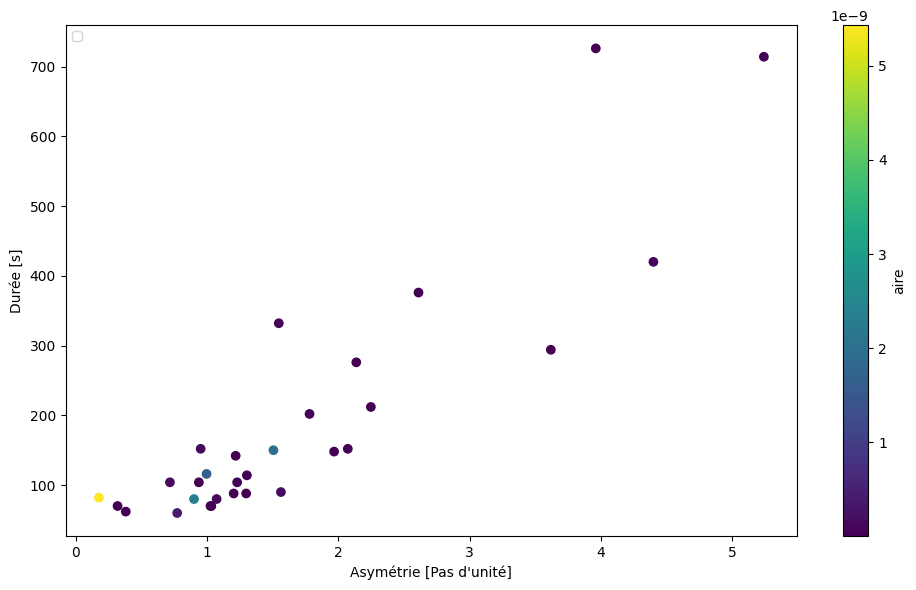

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Supposons que 'features_dataframe' contient les colonnes 'volume', 'length', et 'height'
X = "asymétrie"
Y = "durée"
Z = "aire"   # energie_max_trace		Impulsion

# Création de la figure
plt.figure(figsize=(10, 6))

# Utilisation d'une colormap pour les valeurs de Z (hauteur)
sc = plt.scatter(features_dataframe[X], features_dataframe[Y], c=features_dataframe[Z], cmap='viridis')

plt.xlabel("Asymétrie [Pas d'unité]")
plt.ylabel("Durée [s]")

# Échelle logarithmique
# plt.xscale("log")
# plt.yscale("log")

# Ajouter une barre de couleurs pour montrer la colormap en fonction de la hauteur (Z)
cbar = plt.colorbar(sc, label=Z)

#plot_linear_regression(features_dataframe, X, Y)
#plot_polynomial_regression(features_dataframe, X, Y, degree=1)

# Légende pour les types
# handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in color_map.items()]
# plt.legend(handles=handles, title="type", loc='upper right', bbox_to_anchor=(1.4, 1))

plt.legend(loc='upper left', fontsize=9)

# Sauvegarder la figure
plt.tight_layout()
plt.savefig(f"figures/final/figures_{X}_{Y}_{Z}.pdf")
plt.show()

In [18]:
FC_ent	Slope_BF_ent	Intercept_BF_ent	First Value_BF_ent	FC_value_ent	Slope_HF_ent	Intercept_HF_ent	Last Value_HF_ent

SyntaxError: invalid syntax (3558178210.py, line 1)

In [ ]:
"""
#code a tester

import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))

features0 = pd.read_csv("features_all.csv")

features0 = features0[(features0["alpha_spectre"] < 16) & (features0["alpha_spectre"] > 0)]
features0 = features0[features0["FC spectre"] < 2.5]
features0 = features0[features0["hl"] < 0.65]
features0 = features0[features0["Impulsion"] < 10**-11]


A0_plot = []
volume_plot = []
distance_plot = []

# features0 = pd.read_csv("features_news_with_3_stations_0.csv")
# features1 = pd.read_csv("features_news_with_3_stations_1.csv")
# features2 = pd.read_csv("features_news_with_3_stations_2.csv")

for i, ev in features0.iterrows():
    A0 = features0["alpha_spectre"][i]
    A0_plot.append(A0)

    volume = features0["longueur"][i]
    volume_plot.append(volume)

    length = features0["FC spectre"][i]
    distance_plot.append(length)


# sc = ax.scatter(distance_plot, volume_plot, c=A0_plot, marker = "o", cmap='viridis', label = "station 1") #x ^

# for i, ev in features1.iterrows():
#     A0 = features1["A0 spectre"][i]
#     A0 = np.log(A0)
#     A0_plot.append(A0)

#     volume = features1["volume_event"][i]
#     volume_plot.append(volume)

#     length = features1["FC spectre"][i]
#     length = np.sqrt(length)
#     distance_plot.append(length)

# sc = ax.scatter(distance_plot, volume_plot, c=A0_plot, marker = "^", cmap='viridis', label = "station 2") #x ^

# for i, ev in features2.iterrows():
#     A0 = features2["A0 spectre"][i]
#     A0 = np.log(A0)
#     A0_plot.append(A0)

#     volume = features2["volume_event"][i]
#     volume_plot.append(volume)

#     length = features2["FC spectre"][i]
#     length = np.sqrt(length)
#     distance_plot.append(length)

sc = ax.scatter(distance_plot, A0_plot, c=volume_plot, marker = "o", cmap='viridis')#, label = "station 3") #x ^
ax.set_xlabel("FC [Hz]")
ax.set_ylabel("Alpha")
# ax.set_xscale('log')
# ax.set_yscale('log')

cbar = plt.colorbar(sc)
cbar.set_label(r"Volume [m$^{3}$]")
# plt.legend()
plt.savefig("figures/distance_volume_A0.pdf")
plt.show()
"""

In [ ]:
"""
scatter_matrix(fitting_1, figsize=(10, 10), diagonal='kde')
scatter_matrix(energy_2, figsize=(10, 10), diagonal='kde')
scatter_matrix(entropy_3, figsize=(10, 10), diagonal='kde')
"""